In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from scipy import stats

In [3]:
# import data

dataFemales = pd.read_csv('MA_Exer_PikesPeak_Females.txt',delimiter='\t',encoding='latin-1')
dataMales = pd.read_csv('MA_Exer_PikesPeak_Males.txt',delimiter='\t',encoding='latin-1')

In [4]:
# parse race times and convert to float

time = re.compile(r'[A-Z]?\s*(1)?:?([0-5][0-9]):([0-5][0-9])')

def toMinutes(timeList):
    hours = []
    minutes = []
    seconds = []
    # separate race time string into hours, minutes, and seconds string lists
    for i in list(timeList):
        m = time.match(i)
        hours.append(m.group(1))
        minutes.append(m.group(2))
        seconds.append(m.group(3))
    # convert string lists into floats
    minutes = [float(i) for i in minutes]
    seconds = [float(i) for i in seconds]
    hours = [float(i or 0) for i in hours]
    timeFloat = []
    # convert hours, minutes, seconds to only minutes float
    for i in range(0,len(minutes)):
        totalTime = (60*hours[i] + minutes[i] + seconds[i]/60)
        timeFloat.append(totalTime)
    return timeFloat

In [ ]:
# convert minutes back to a time string

def toRaceString(minutesFloat):
    if minutesFloat >= 60:
        h = str(int(minutesFloat//60))
        m = format(int(minutesFloat-60*int(h)),'02')
        s = format(int((minutesFloat - int(minutesFloat))*60),'02')
        return(h+':'+m+':'+s)
    else:
        m = format(int(minutesFloat),'02')
        s = format(int((minutesFloat - int(minutesFloat))*60),'02')
        return(m+':'+s)

In [5]:
femaleGunTimes = np.array(toMinutes(dataFemales['Gun Tim']))
maleGunTimes = np.array(toMinutes(dataMales['Gun Tim']))
femaleNetTimes = np.array(toMinutes(dataFemales['Net Tim']))
maleNetTimes = np.array(toMinutes(dataMales['Net Tim']))

In [6]:
femaleDif = femaleGunTimes-femaleNetTimes
maleDif = maleGunTimes-maleNetTimes

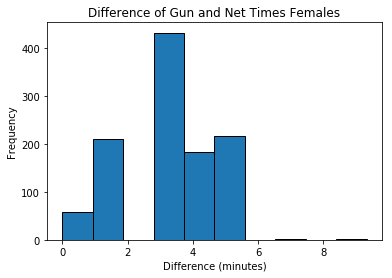

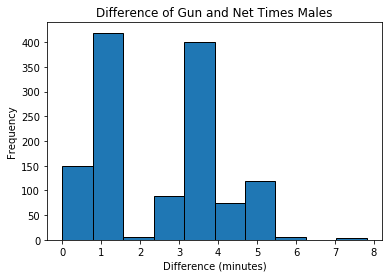

In [7]:
plt.hist(femaleDif,edgecolor='black')
plt.title('Difference of Gun and Net Times Females')
plt.xlabel('Difference (minutes)')
plt.ylabel('Frequency')
plt.show()

plt.hist(maleDif,edgecolor='black')
plt.title('Difference of Gun and Net Times Males')
plt.xlabel('Difference (minutes)')
plt.ylabel('Frequency')
plt.show()

Gun Time is defined as the elapsed time from the formal start of the race and when the racer crossed the finish line.
Net Time is defined as the elapsed time from when the racer crossed the starting line and when the racer crossed the finish line. These have different times because not all racers can physically be line up together right at the starting line. Some racers will be behind others, the order usually determined by the racer's pace (faster to slower racers).

How would age or pace affect the difference in gun and net time? As pace increases, gun - net should increase.